In [2]:
import pandas as pd

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

display(df)

,id,diagnosis,...,worst_symmetry,worst_fractal_dimension
0,842302,M,...,0.4601,0.11890
1,842517,M,...,0.2750,0.08902
...,...,...,...,...,...
567,927241,M,...,0.4087,0.12400
568,92751,B,...,0.2871,0.07039


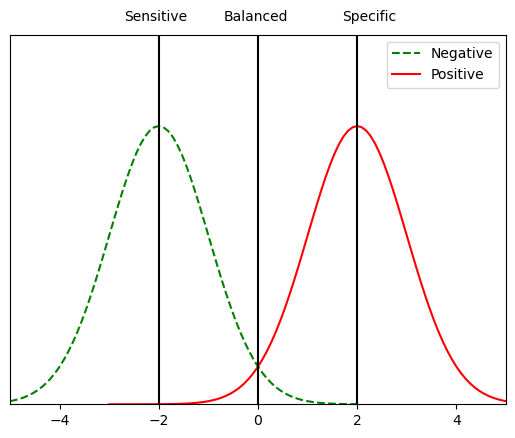

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green", 
         linestyle='dashed')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
plt.axvline(x=-2,color="black")
plt.axvline(x=0,color="black")
plt.axvline(x=+2,color="black")
plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative','Positive'])
plt.yticks([])
plt.show()

In [3]:
from scipy.stats import zscore

x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

# Convert to numpy - Regression
x = df[x_columns].values
y = df['diagnosis'].map({'M':1,"B":0}).values # Binary classification, 
                                              # M is 1 and B is 0

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 - 2s - 119ms/step - accuracy: 0.8474 - loss: 0.6838 - val_accuracy: 0.9441 - val_loss: 0.6601
Epoch 2/1000
14/14 - 0s - 7ms/step - accuracy: 0.9413 - loss: 0.6186 - val_accuracy: 0.9510 - val_loss: 0.5166
Epoch 3/1000
14/14 - 0s - 7ms/step - accuracy: 0.9484 - loss: 0.4160 - val_accuracy: 0.9580 - val_loss: 0.2553
Epoch 4/1000
14/14 - 0s - 7ms/step - accuracy: 0.9601 - loss: 0.1890 - val_accuracy: 0.9720 - val_loss: 0.0971
Epoch 5/1000
14/14 - 0s - 7ms/step - accuracy: 0.9671 - loss: 0.1065 - val_accuracy: 0.9720 - val_loss: 0.0600
Epoch 6/1000
14/14 - 0s - 7ms/step - accuracy: 0.9789 - loss: 0.0790 - val_accuracy: 0.9720 - val_loss: 0.0549
Epoch 7/1000
14/14 - 0s - 7ms/step - accuracy: 0.9789 - loss: 0.0715 - val_accuracy: 0.9720 - val_loss: 0.0537
Epoch 8/1000
14/14 - 0s - 7ms/step - accuracy: 0.9812 - loss: 0.0652 - val_accuracy: 0.9790 - val_loss: 0.0509
Epoch 9/1000
14/14 - 0s - 7ms/step - accuracy: 0.9836 - loss: 0.0596 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 10/100

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


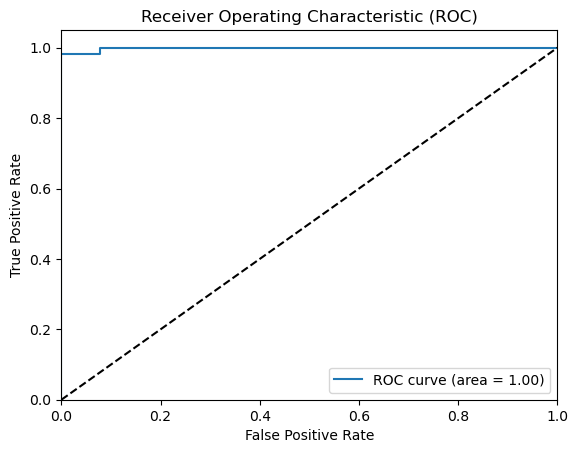

In [6]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

In [14]:
import pandas as pd
from scipy.stats import zscore

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job",dtype=int)],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area",dtype=int)],axis=1)
df.drop('area', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product'],dtype=int) # Classification
products = dummies.columns
y = dummies.values

In [15]:
print(x)

[[-0.60754957 -0.66491815 -0.20844851 ...  0.          1.
   0.        ]
 [ 0.33805295 -0.20774798  0.83903145 ...  0.          1.
   0.        ]
 [-0.18420492  1.12790602 -0.20844851 ...  0.          1.
   0.        ]
 ...
 [-2.82697122  1.51336322  1.88651142 ...  0.          0.
   1.        ]
 [ 1.09310058 -1.27447836 -1.25592848 ...  0.          1.
   0.        ]
 [ 0.44742528 -0.35117392 -1.25592848 ...  0.          1.
   0.        ]]


In [16]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(y.shape[1],activation='softmax',
                kernel_initializer='random_normal'))
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 - 1s - 28ms/step - accuracy: 0.3867 - loss: 1.5122 - val_accuracy: 0.4980 - val_loss: 1.1419
Epoch 2/1000
47/47 - 0s - 3ms/step - accuracy: 0.4713 - loss: 1.1471 - val_accuracy: 0.4980 - val_loss: 1.0861
Epoch 3/1000
47/47 - 0s - 3ms/step - accuracy: 0.4973 - loss: 1.0792 - val_accuracy: 0.5220 - val_loss: 1.0160
Epoch 4/1000
47/47 - 0s - 4ms/step - accuracy: 0.6000 - loss: 0.9581 - val_accuracy: 0.5740 - val_loss: 0.9358
Epoch 5/1000
47/47 - 0s - 4ms/step - accuracy: 0.6707 - loss: 0.8386 - val_accuracy: 0.6500 - val_loss: 0.8534
Epoch 6/1000
47/47 - 0s - 3ms/step - accuracy: 0.6753 - loss: 0.7984 - val_accuracy: 0.6740 - val_loss: 0.8034
Epoch 7/1000
47/47 - 0s - 3ms/step - accuracy: 0.6887 - loss: 0.7595 - val_accuracy: 0.6880 - val_loss: 0.8006
Epoch 8/1000
47/47 - 0s - 3ms/step - accuracy: 0.7013 - loss: 0.7398 - val_accuracy: 0.7000 - val_loss: 0.7815
Epoch 9/1000
47/47 - 0s - 4ms/step - accuracy: 0.6987 - loss: 0.7298 - val_accuracy: 0.6740 - val_loss: 0.7731
Epoch 10/1000

In [17]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1) 
# raw probabilities to chosen class (highest probability)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [18]:
from sklearn import metrics

y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.704


In [19]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

# raw probabilities to chosen class (highest probability)
pred = np.argmax(pred,axis=1) 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
Numpy array of predictions


array([[0.    , 0.1114, 0.7906, 0.0967, 0.0013, 0.    , 0.    ],
       [0.    , 0.7027, 0.296 , 0.0001, 0.0012, 0.    , 0.    ],
       [0.    , 0.6868, 0.308 , 0.0004, 0.0045, 0.0002, 0.    ],
       [0.    , 0.3425, 0.647 , 0.0076, 0.0028, 0.0001, 0.    ],
       [0.    , 0.031 , 0.6105, 0.3581, 0.0003, 0.    , 0.    ]],
      dtype=float32)

As percent probability
[ 0.0001 11.14   79.0602  9.6655  0.1328  0.0013  0.0001]
Log loss score: 0.7421171205329841


C:\Users\HP\AppData\Local\Temp\ipykernel_23224\2665920359.py:12: RuntimeWarning: divide by zero encountered in log
  ax1.plot(t, np.log(t))


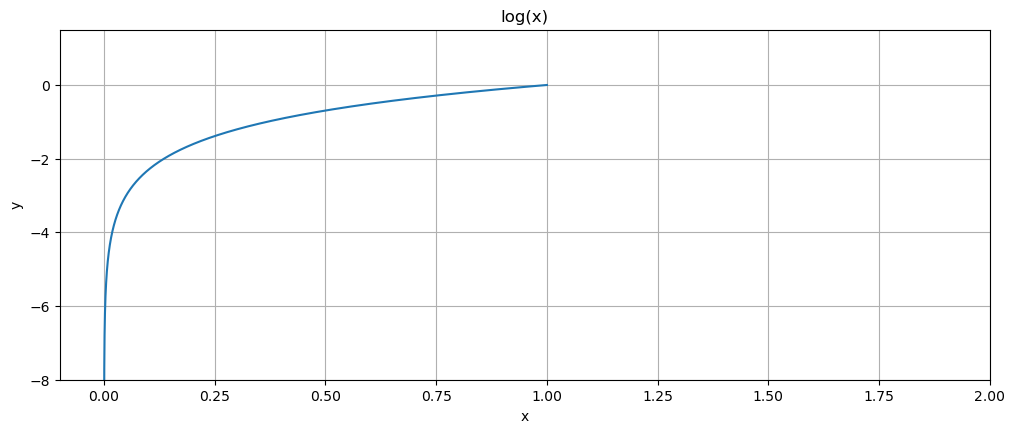

In [20]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi

#t = arange(1e-5, 5.0, 0.00001)
#t = arange(1.0, 5.0, 0.00001) # computer scientists
t = arange(0.0, 1.0, 0.00001)  # data     scientists

fig = figure(1,figsize=(12, 10))

ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')

show()

Normalized confusion matrix
[[0.95 0.05 0.   0.   0.   0.   0.  ]
 [0.02 0.77 0.22 0.   0.   0.   0.  ]
 [0.   0.25 0.74 0.01 0.   0.   0.  ]
 [0.   0.   0.86 0.14 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.59 0.41 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


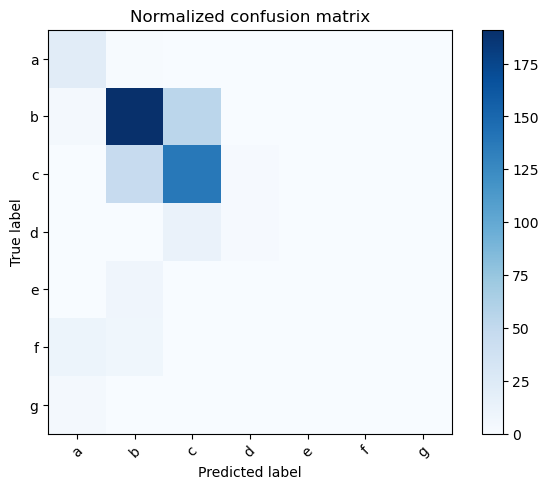

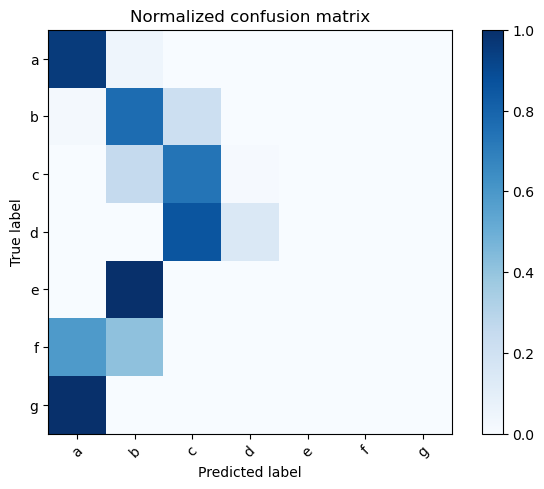

In [22]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
plot_confusion_matrix(cm, products, 
        title='Normalized confusion matrix')
np.set_printoptions(precision=2)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, products, 
        title='Normalized confusion matrix')

plt.show()